In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Mounted at /content/drive


**Support Vector Machine**

In [ ]:
digits = pd.read_csv('/content/drive/MyDrive/digits.csv',header=None)

digits.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,7
1,0.0,0.0,0.0,0.20392,0.30196,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.039216,0.48235,0.22353,0.0,2
2,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,1
3,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,0
4,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,4


In [ ]:
digits.rename(columns={400: 'Label'}, inplace=True)

digits.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,Label
0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,7
1,0.0,0.0,0.0,0.20392,0.30196,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.039216,0.48235,0.22353,0.0,2
2,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,1
3,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,0
4,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00000,0.0,4


In [ ]:
subDigits = digits[(digits["Label"] == 2) | (digits["Label"] == 6)]

labels = subDigits["Label"]

subDigits = subDigits.drop(columns=['Label'])

subDigits.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
1,0.0,0.0,0.0,0.20392,0.30196,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.039216,0.48235,0.22353,0.0
11,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
21,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
22,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.00000,0.0
35,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.30196,0.200000,0.00000,0.00000,0.0


In [ ]:
labels.head()

1     2
11    6
21    6
22    6
35    2
Name: Label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( subDigits , labels, test_size=0.30, random_state=42)


**Report precision, recall and accuracy values of the classifier on the training and the test data.**

precision = Correct Class 1 Prediction/ All Class 1 Predictions

recall = Correct Class 1 Prediction/ All Class 1 Instances

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

'''
SVM = SVC(random_state = 42)
SVM.fit(X_train,y_train)

predictions = SVM.predict(X_test)
svm_accuracy = accuracy_score(predictions, y_test)

c = [0.0001, 0.001 ,0.01 ,0.1 ,1 ,10 ,100]

print("The accuracy of SVM is:" ,svm_accuracy)
'''

'\nSVM = SVC(random_state = 42)\nSVM.fit(X_train,y_train)\n\npredictions = SVM.predict(X_test)\nsvm_accuracy = accuracy_score(predictions, y_test)\n\nc = [0.0001, 0.001 ,0.01 ,0.1 ,1 ,10 ,100]\n\nprint("The accuracy of SVM is:" ,svm_accuracy)\n'

#LINEAR KERNEL

In [ ]:
c = [0.0001, 0.001 ,0.01 ,0.1 ,1 ,10 ,100]

accuracies = []
scores = []

for cVal in c:
  SVM_crossVal = SVC(C = cVal, kernel = "linear")
  SVM_crossVal.fit(X_train,y_train)

  predictions_CV = SVM_crossVal.predict(X_test)
  CV_accuracy = accuracy_score(y_test,predictions_CV)
  CV_score = cross_val_score(SVM_crossVal, X_train, y_train, cv=2)

  accuracies.append(CV_accuracy)
  scores.append(CV_score)


In [ ]:
for i in range(len(c)):
  print("For C = ",c[i] )
  print("accuracy is", accuracies[i])
  print("cross validation is ",scores[i])
  print("-----------------------\n")

print("Best accuracy is C = 0.01")

For C =  0.0001
accuracy is 0.5268456375838926
cross validation is  [0.5389049  0.53602305]
-----------------------

For C =  0.001
accuracy is 0.9630872483221476
cross validation is  [0.93659942 0.9221902 ]
-----------------------

For C =  0.01
accuracy is 0.9697986577181208
cross validation is  [0.95677233 0.94524496]
-----------------------

For C =  0.1
accuracy is 0.9630872483221476
cross validation is  [0.95389049 0.94524496]
-----------------------

For C =  1
accuracy is 0.959731543624161
cross validation is  [0.95389049 0.94524496]
-----------------------

For C =  10
accuracy is 0.959731543624161
cross validation is  [0.95389049 0.94524496]
-----------------------

For C =  100
accuracy is 0.959731543624161
cross validation is  [0.95389049 0.94524496]
-----------------------

Best accuracy is C = 0.01


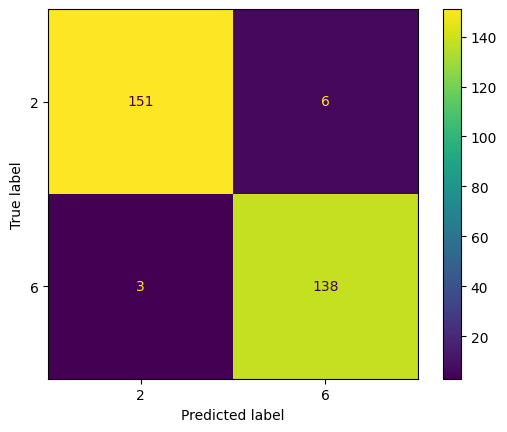


Accuracy =  0.9697986577181208 

For Digit 2: Precision is 0.9805194805194806 Recall is 0.9617834394904459 

For Digit 6: Precision is 0.9583333333333334 Recall is 0.9787234042553191


In [ ]:
SVM = SVC(C = 0.01, kernel = "linear")
SVM.fit(X_train,y_train)
predictions = SVM.predict(X_test)

cm = confusion_matrix(y_test, predictions, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=SVM.classes_)
CV_accuracy = accuracy_score(y_test,predictions)

disp.plot()
plt.show()

print("\nAccuracy = ", CV_accuracy,"\n")

precisions,recalls,fscores,suports = precision_recall_fscore_support(y_test, predictions)


print("For Digit 2: Precision is", precisions[0], "Recall is", recalls[0],"\n")
print("For Digit 6: Precision is",  precisions[1], "Recall is", recalls[1])

#RBF KERNEL

In [ ]:
C = [0.0001, 0.001 ,0.01 ,0.1 ,1 ,10 ,100]
gamma = [2**-4,2**-3,2**-2,2**-1,2**0]

In [ ]:

accuracies = []
scores = []
for cVal in C:
  accuracy = []
  score = []
  for g in gamma:
    SVM_crossVal = SVC(C = cVal, gamma = g, kernel = "rbf")
    SVM_crossVal.fit(X_train,y_train)

    predictions_CV = SVM_crossVal.predict(X_test)
    CV_accuracy = accuracy_score(y_test,predictions_CV)
    #CV_score = cross_val_score(SVM_crossVal, X_train, y_train, cv=2)

    accuracy.append(CV_accuracy)
    #score.append(CV_score)

  #scores.append(score)
  accuracies.append(accuracy)

print(accuracies)

[[0.5268456375838926, 0.5268456375838926, 0.5268456375838926, 0.5268456375838926, 0.5268456375838926], [0.5268456375838926, 0.5268456375838926, 0.5268456375838926, 0.5268456375838926, 0.5268456375838926], [0.5268456375838926, 0.5268456375838926, 0.5268456375838926, 0.5268456375838926, 0.5268456375838926], [0.5838926174496645, 0.5268456375838926, 0.5268456375838926, 0.5268456375838926, 0.5268456375838926], [0.9798657718120806, 0.7718120805369127, 0.5302013422818792, 0.5268456375838926, 0.5268456375838926], [0.9832214765100671, 0.7751677852348994, 0.5335570469798657, 0.5268456375838926, 0.5268456375838926], [0.9832214765100671, 0.7751677852348994, 0.5335570469798657, 0.5268456375838926, 0.5268456375838926]]


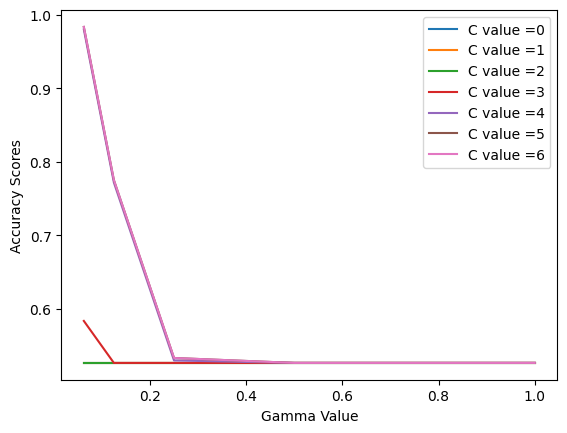

In [ ]:
fig = plt.figure()

for index in range(len(accuracies)):
    lbl = "C value =" + str(index)
    plt.plot(gamma,accuracies[index],label = lbl)
    plt.xlabel("Gamma Value")
    plt.ylabel("Accuracy Scores")

plt.legend()
plt.show()

Some scores are very similar so I will use the following library to find the best one:

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = [
    { 'C' : [0.0001, 0.001 ,0.01 ,0.1 ,1 ,10 ,100],
     'gamma':[2**-4,2**-3,2**-2,2**-1,2**0], # gamma is this one γ , γ = − 1/(2*(mu**2)) :
      'kernel' : ['rbf']}
]

optimal_params = GridSearchCV(SVC(),parameters,scoring='accuracy')

optimal_params.fit(X_train,y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.0625, 'kernel': 'rbf'}


# Report precision, recall, F1 and accuracy values of the classifier

For Digit 2: Precision is 0.9936305732484076 Recall is 0.968944099378882 

For Digit 6: Precision is 0.9645390070921985 Recall is 0.9927007299270073 

Best accuracy is as follows: 0.9798657718120806 

F1 Score is [0.98113208 0.97841727]


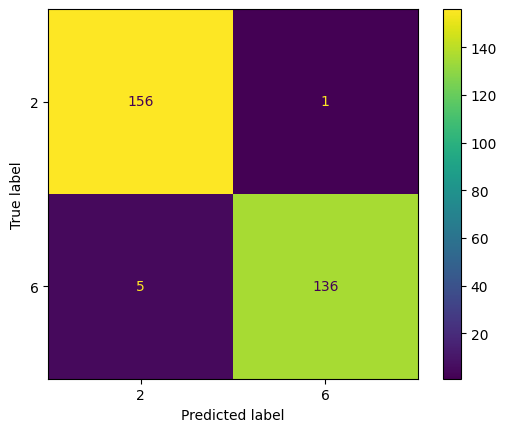

In [ ]:
SVM_best = SVC(C = 1, gamma = 0.0625, kernel = "rbf")
SVM_best.fit(X_train,y_train)

predictions_best = SVM_best.predict(X_test)
cm_best = confusion_matrix(y_test, predictions_best, labels= SVM_best.classes_)
disp_best = ConfusionMatrixDisplay(confusion_matrix= cm_best ,display_labels= SVM_best.classes_)

best_accuracy = accuracy_score(predictions_best,y_test)

precisionsBest,recallsBest,fscoresBest,supportsBest = precision_recall_fscore_support(predictions_best, y_test)

print("For Digit 2: Precision is", precisionsBest[0], "Recall is", recallsBest[0],"\n")
print("For Digit 6: Precision is",  precisionsBest[1], "Recall is", recallsBest[1],"\n")

print("Best accuracy is as follows:" , best_accuracy ,"\n")
print("F1 Score is", fscoresBest)

disp_best.plot()
plt.show()